In [166]:
!nvidia-smi

Wed Jul  2 21:20:15 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-PCIE-32GB           On  | 00000000:D8:00.0 Off |                    0 |
| N/A   29C    P0              25W / 250W |      0MiB / 32768MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
pwd

'/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575'

In [1]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# DATASET_NAMES = ["emotion", "math", "mmlu", "programming"]
# DATASET_PATH = "emotion_processed.csv"
# df = load_dataset(DATASET_PATH)


DATASET_NAMES = ["emotion", "math", "mmlu", "programming"]
DATASET_PATHS = [f"datasets/{name}_processed.csv" for name in DATASET_NAMES]

# Load and concatenate all datasets
df = pd.concat([pd.read_csv(path) for path in DATASET_PATHS], ignore_index=True)



In [9]:
df.dropna(inplace=True)
df.head()

,type,prompt,category,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_2/width_16k/canonical-top_mean_ids,...,gemma-scope-2b-pt-mlp-canonical-layer_22/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-mlp-canonical-layer_23/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-mlp-canonical-layer_23/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-mlp-canonical-layer_23/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-mlp-canonical-layer_24/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-mlp-canonical-layer_24/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-mlp-canonical-layer_24/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-mlp-canonical-layer_25/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-mlp-canonical-layer_25/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-mlp-canonical-layer_25/width_16k/canonical-token_feature_ids
0,empathetic_dialogue,When I was a child I was in a tornado.,afraid,"[[8920, 12838, 12950, 275, 15454, 10006, 1381,...","[[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...","[8920, 12838, 12950, 4194, 3706, 2296, 9570, 1...","[[9770, 5146, 12054, 740, 13412, 10589, 12539,...","[[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...","[9770, 5146, 12054, 11522, 7322, 12054, 6999, ...","[[15089, 14059, 7132, 7361, 4885, 13977, 11527...",...,"[4723, 2531, 12567, 4723, 16067, 9940, 5002, 7...","[[3567, 14957, 0, 5805, 11472, 1000, 10184, 14...","[[139.31, 70.22, 68.3, 59.77, 45.67, 33.31, 32...","[3567, 14957, 0, 10184, 15497, 7466, 15196, 10...","[[16058, 282, 102, 9478, 9835, 10304, 9243, 39...","[[306.12, 240.2, 73.45, 48.24, 40.77, 39.54, 3...","[16058, 282, 102, 282, 9329, 10304, 282, 11515...","[[15890, 12642, 10593, 8735, 6608, 11319, 1124...","[[203.72, 73.83, 46.11, 36.68, 34.49, 32.86, 2...","[15890, 12642, 10593, 4589, 13264, 8171, 4589,..."
1,empathetic_dialogue,One time i heard someone outside my window.,afraid,"[[8920, 12838, 12950, 275, 15454, 10006, 1381,...","[[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...","[8920, 12838, 12950, 9869, 2082, 2366, 15045, ...","[[9770, 5146, 12054, 740, 13412, 10589, 12539,...","[[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...","[9770, 5146, 12054, 5343, 11492, 6631, 15045, ...","[[15089, 14059, 7132, 7361, 4885, 13977, 11527...",...,"[4723, 2531, 12567, 9666, 14947, 11983, 4723, ...","[[3567, 14957, 0, 5805, 11472, 1000, 10184, 14...","[[139.31, 70.22, 68.3, 59.77, 45.67, 33.31, 32...","[3567, 14957, 0, 15497, 10184, 7025, 15497, 23...","[[16058, 282, 102, 9478, 9835, 10304, 9243, 39...","[[306.12, 240.2, 73.45, 48.24, 40.77, 39.54, 3...","[16058, 282, 102, 282, 9329, 9807, 282, 9329, ...","[[15890, 12642, 10593, 8735, 6608, 11319, 1124...","[[203.72, 73.83, 46.11, 36.68, 34.49, 32.86, 2...","[15890, 12642, 10593, 4589, 13264, 8171, 13264..."
2,empathetic_dialogue,I keep hearing things in my kitchen. I think t...,afraid,"[[8920, 12838, 12950, 275, 15454, 10006, 1381,...","[[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...","[8920, 12838, 12950, 9528, 12207, 8920, 9286, ...","[[9770, 5146, 12054, 740, 13412, 10589, 12539,...","[[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...","[9770, 5146, 12054, 7318, 12054, 592, 4581, 53...","[[15089, 14059, 7132, 7361, 4885, 13977, 11527...",...,"[4723, 2531, 12567, 4029, 4723, 752, 11958, 32...","[[3567, 14957, 0, 5805, 11472, 1000, 10184, 14...","[[139.31, 70.22, 68.3, 59.77, 45.67, 33.31, 32...","[3567, 14957, 0, 14433, 16031, 10184, 10955, 9...","[[16058, 282, 102, 9478, 9835, 10304, 9243, 39...","[[306.12, 240.2, 73.45, 48.24, 40.77, 39.54, 3...","[16058, 282

In [10]:
df.describe()

,type,prompt,category,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_2/width_16k/canonical-top_mean_ids,...,gemma-scope-2b-pt-mlp-canonical-layer_22/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-mlp-canonical-layer_23/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-mlp-canonical-layer_23/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-mlp-canonical-layer_23/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-mlp-canonical-layer_24/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-mlp-canonical-layer_24/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-mlp-canonical-layer_24/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-mlp-canonical-layer_25/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-mlp-canonical-layer_25/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-mlp-canonical-layer_25/width_16k/canonical-token_feature_ids
count,16292,16292,16292,16292,16292,16292,16292,16292,16292,16292,...,16292,16292,16292,16292,16292,16292,16292,16292,16292,16292
unique,4,16261,98,16261,16261,16261,16261,16261,16261,16261,...,16257,16261,16261,16259,16261,16261,16243,16261,16261,16255
top,math,When the least common multiple of two positive...,external,"[[8920, 12838, 12950, 275, 15454, 10006, 1381,...","[[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...","[8920, 12838, 12950, 4194, 3706, 2296, 4735, 2...","[[9770, 5146, 12054, 740, 13412, 10589, 12539,...","[[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...","[9770, 5146, 12054, 11522, 7322, 12054, 6799, ...","[[15089, 14059, 7132, 7361, 4885, 13977, 11527...",...,"[4723, 2531, 12567, 2123, 418, 474, 6312, 1002...","[[3567, 14957, 0, 5805, 11472, 1000, 10184, 14...","[[139.31, 70.22, 68.3, 59.77, 45.67, 33.31, 32...","[3567, 14957, 0, 9173, 15497, 10184, 4231, 242...","[[16058, 282, 102, 9478, 9835, 10304, 9243, 39...","[[306.12, 240.2, 73.45, 48.24, 40.77, 39.54, 3...","[16058, 282, 102, 282, 9329, 9243, 9243, 16058...","[[15890, 12642, 10593, 8735, 6608, 11319, 1124...","[[203.72, 73.83, 46.11, 36.68, 34.49, 32.86, 2...","[15890, 12642, 10593, 4589, 13264, 8171, 13264..."
freq,4997,2,832,2,2,2,2,2,2,2,...,2,2,2,2,2,2,3,2,2,2


In [11]:
list(df["type"].unique())

['empathetic_dialogue', 'math', 'mmlu', 'programming']

In [16]:
df[df['type'] == 'programming']['category'].unique()

array(['hard', 'easy', 'external'], dtype=object)

# Within score cosine similarity

In [172]:
import os
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

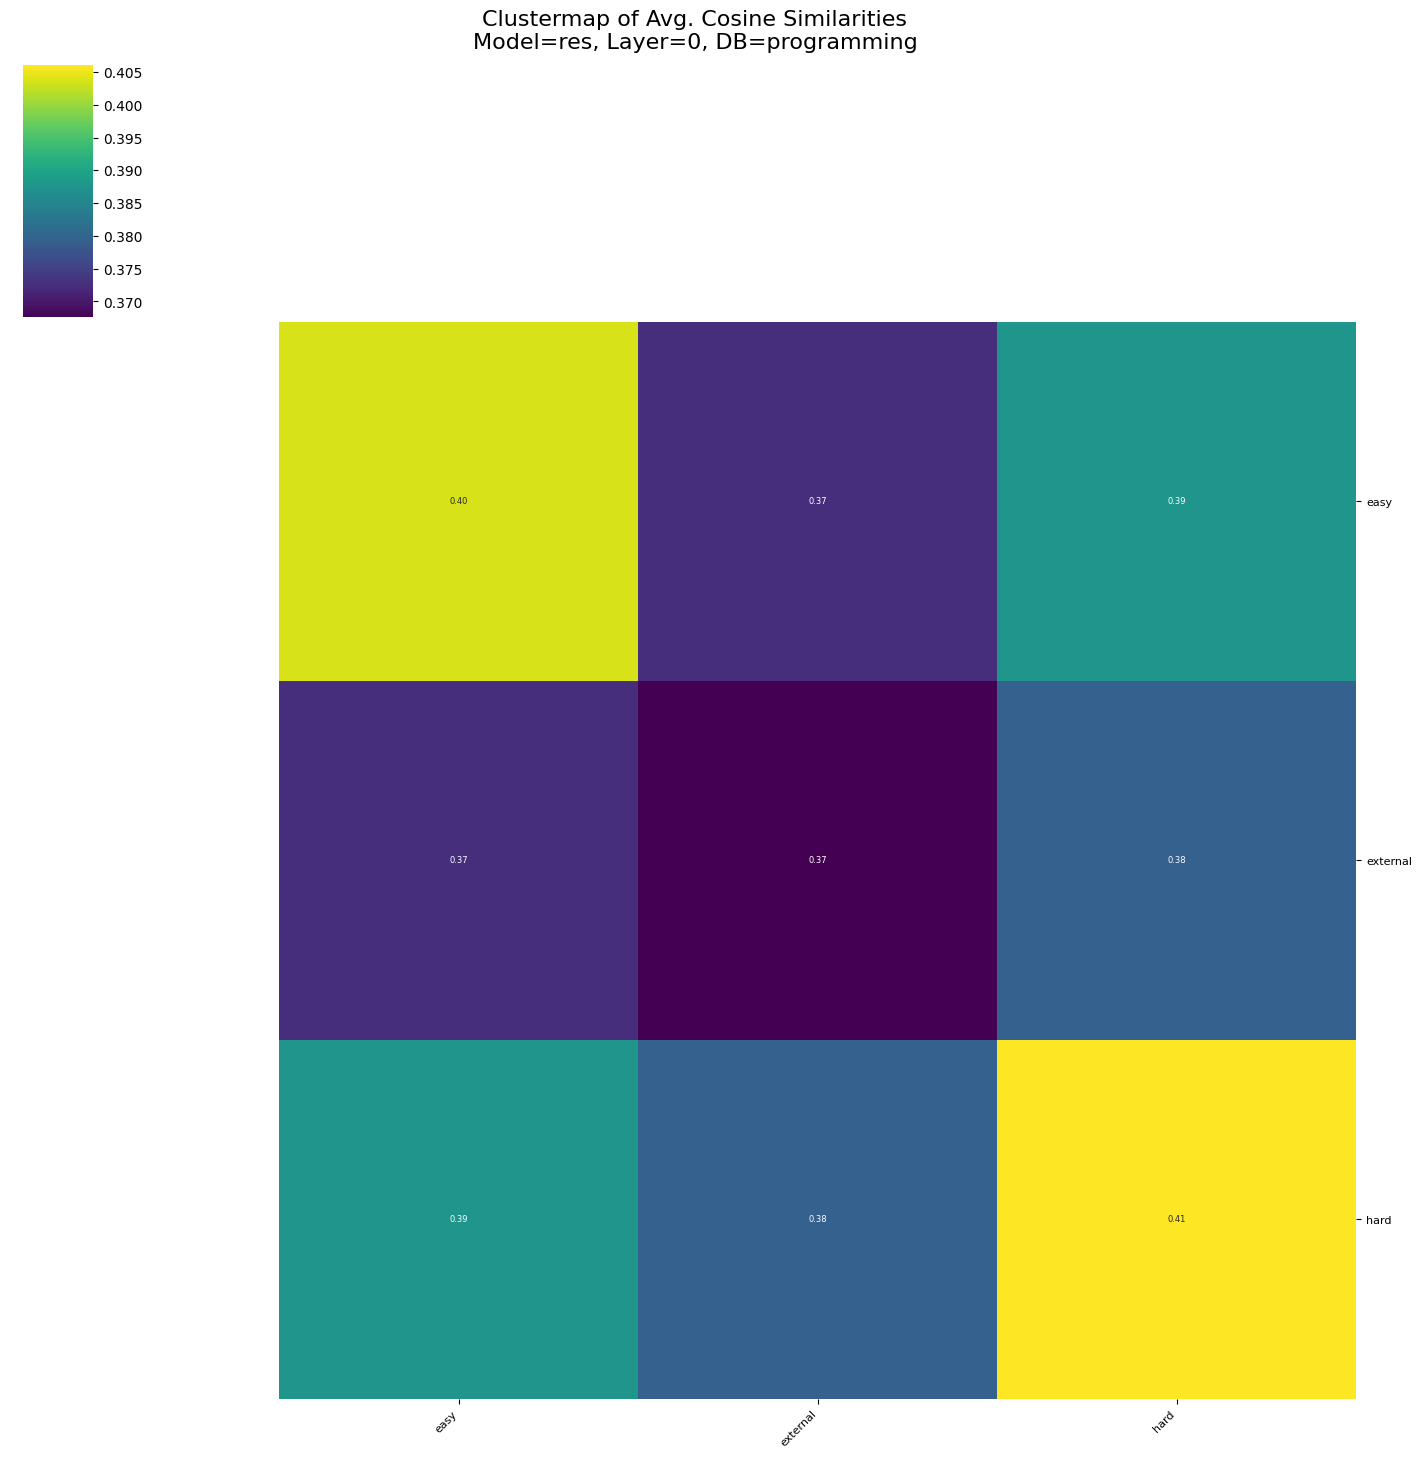

Saved clustermap to figures/clustermap_res_layer0_DB=programming.png
Min cosine-sim:  0.3676
Max cosine-sim:  0.4060
Mean cosine-sim: 0.3841


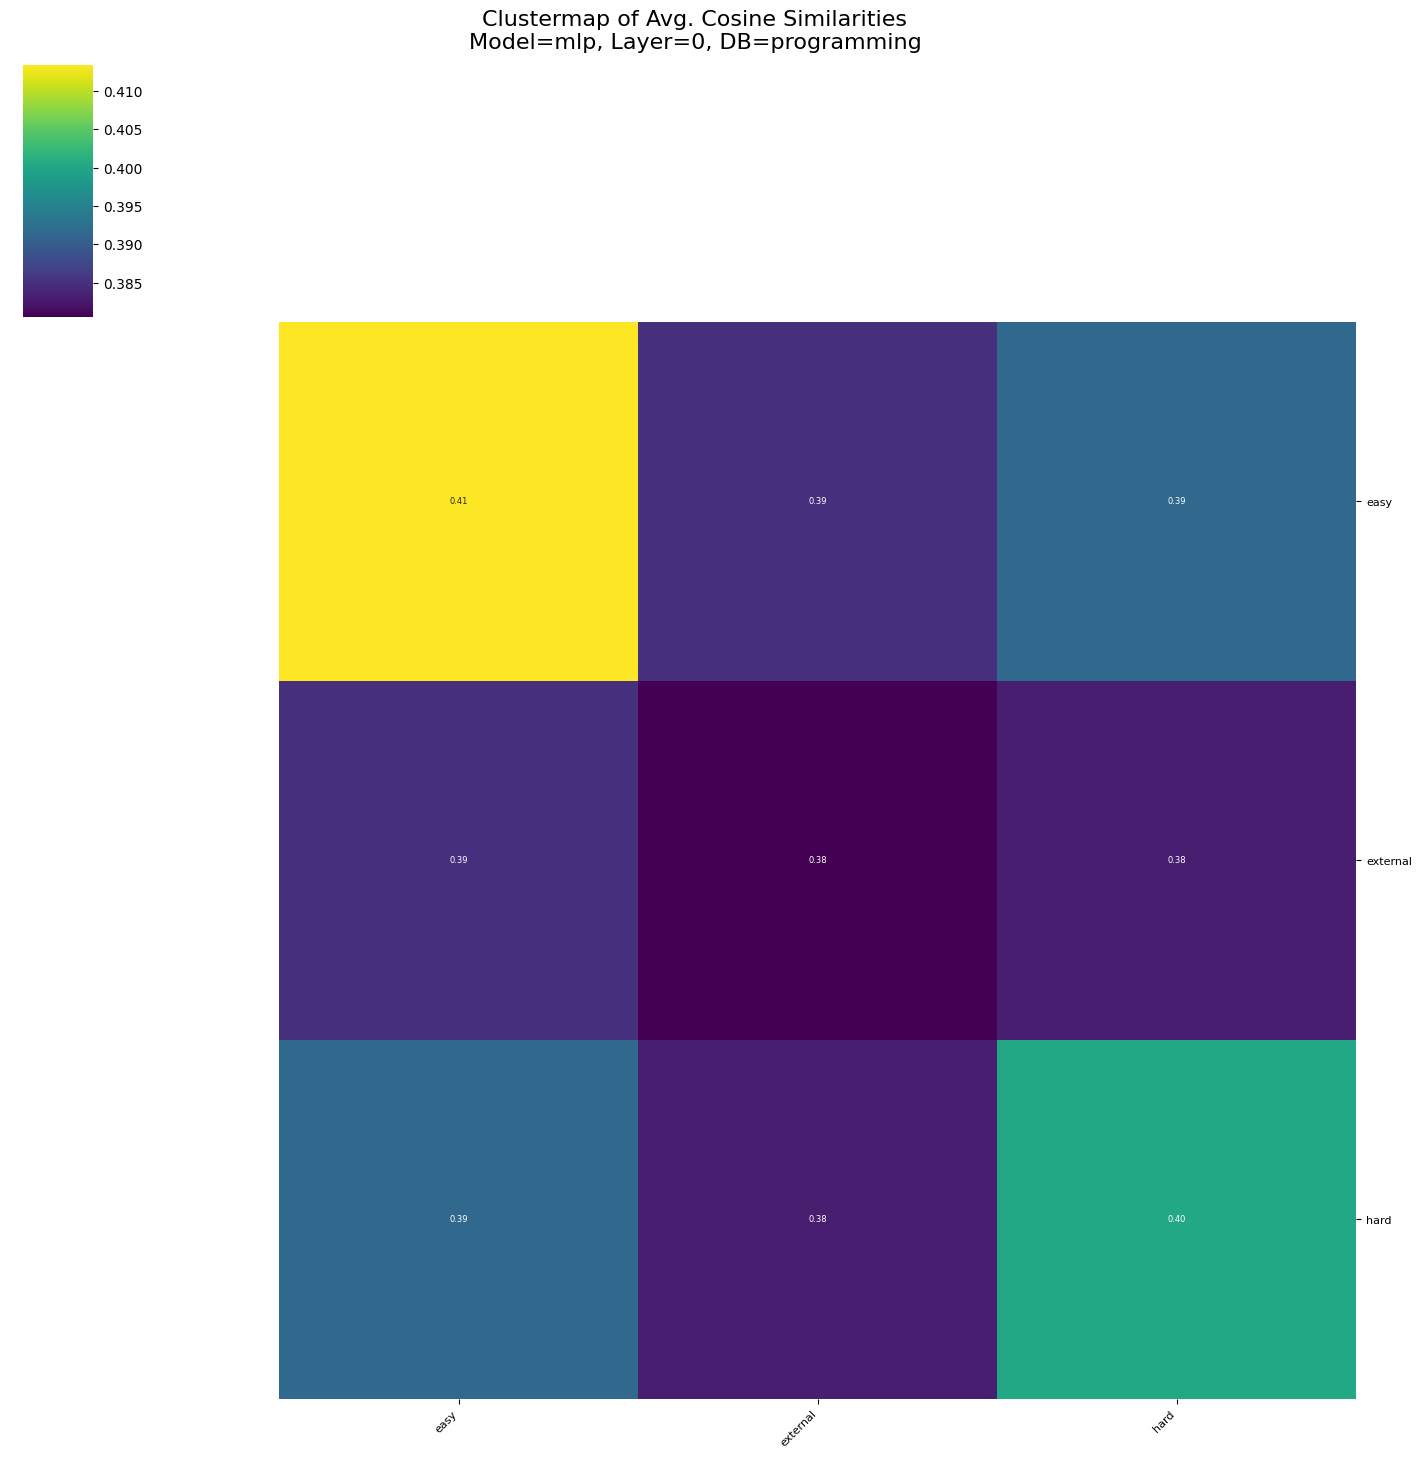

Saved clustermap to figures/clustermap_mlp_layer0_DB=programming.png
Min cosine-sim:  0.3805
Max cosine-sim:  0.4133
Mean cosine-sim: 0.3904


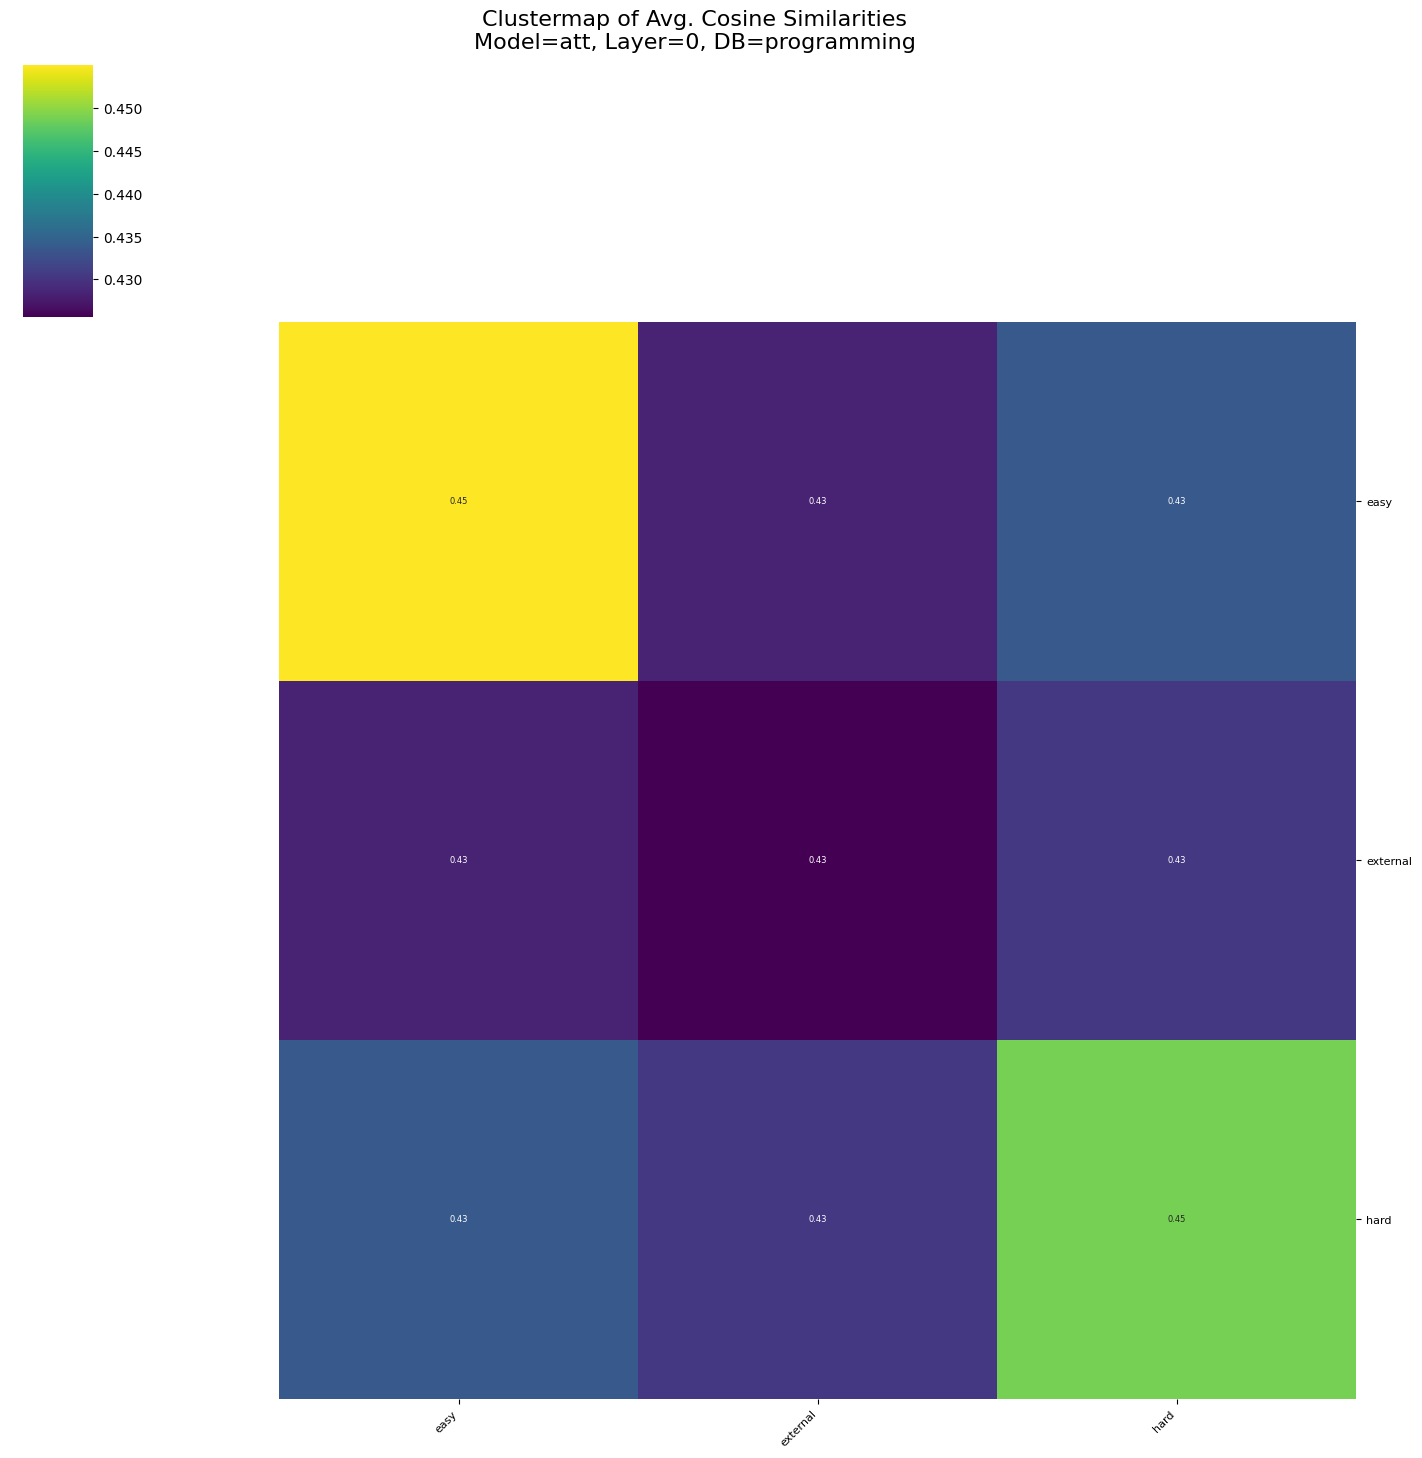

Saved clustermap to figures/clustermap_att_layer0_DB=programming.png
Min cosine-sim:  0.4256
Max cosine-sim:  0.4550
Mean cosine-sim: 0.4349


In [176]:
# --- PARAMETERS ---
TYPE_SAES  = ["res", "mlp", "att"]
for TYPE_SAE in TYPE_SAES:
    LAYER_NUM  = "0"
    COL_NAME   = f'gemma-scope-2b-pt-{TYPE_SAE}-canonical-layer_{LAYER_NUM}/width_16k/canonical-token_feature_ids'
    FIG_DIR    = "figures"
    # DATABASE_NAME = ['empathetic_dialogue', 'math', 'mmlu', 'programming']
    DATABASE_NAME = "programming"
    # --- PREPARE DATA ---
    # Filter to just the empathetic_dialogue examples,
    # then get your list of emotion categories
    # em_df = df[df["type"] == DATABASE_NAME].copy()
    
    em_df = df[df["type"] == DATABASE_NAME].copy().reset_index(drop=True)
    TYPE_NAMES = sorted(em_df["category"].unique())
    # print(TYPE_NAMES)


    # Parse once, binarize once
    # Each row in 'lists' is something like "[12, 409, 5002, ...]"
    lists = em_df[COL_NAME].apply(ast.literal_eval)
    mlb       = MultiLabelBinarizer()
    bin_matrix = mlb.fit_transform(lists)  
    # shape = (n_examples, n_neurons)
    
    # Map each category to the subset of rows
    row_indices = {
        cat: em_df.index[em_df["category"] == cat].tolist()
        for cat in TYPE_NAMES
    }
    # print(row_indices)
    
    # --- BUILD SIMILARITY TABLE ---
    sim_table = pd.DataFrame(
        index=TYPE_NAMES,
        columns=TYPE_NAMES,
        dtype=float
    )
    
    for cat1 in TYPE_NAMES:
        idx1 = row_indices[cat1]
        mat1 = bin_matrix[idx1]
        for cat2 in TYPE_NAMES:
            idx2 = row_indices[cat2]
            mat2 = bin_matrix[idx2]
            
            # Compute all pairwise cosines; if either is empty, set NaN
            if mat1.size == 0 or mat2.size == 0:
                sim = float("nan")
            else:
                sims = cosine_similarity(mat1, mat2)
                sim = sims.mean()
            
            sim_table.at[cat1, cat2] = sim
    
    
    import os
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # --- VISUALIZATION (tweaked for readability) ---
    # os.makedirs(fig_dir, exist_ok=True)
    
    g = sns.clustermap(
        sim_table,
        cmap="viridis",
        annot=True,
        fmt=".2f",
        annot_kws={"size": 6},
        linewidths=0,          # no grid lines
        row_cluster=False,     # disable row dendrogram
        col_cluster=False,     # disable col dendrogram
        figsize=(14, 14),
        cbar_kws={"shrink": 0.5}
    )
    
    # Rotate x-labels for readability
    g.ax_heatmap.set_xticklabels(
        g.ax_heatmap.get_xmajorticklabels(),
        rotation=45,
        ha="right",
        fontsize=8
    )
    
    # Adjust y-labels
    g.ax_heatmap.set_yticklabels(
        g.ax_heatmap.get_ymajorticklabels(),
        rotation=0,
        fontsize=8
    )
    
    # Set the title using the passed arguments
    g.fig.suptitle(
        f"Clustermap of Avg. Cosine Similarities\nModel={TYPE_SAE}, Layer={LAYER_NUM}, DB={DATABASE_NAME}",
        y=1.02,
        fontsize=16
    )
    
    # Create the output path using the passed arguments
    out_path = os.path.join(FIG_DIR, f"clustermap_{TYPE_SAE}_layer{LAYER_NUM}_DB={DATABASE_NAME}.png")
    g.fig.savefig(out_path, bbox_inches="tight", dpi=300)
    plt.show()
    
    print(f"Saved clustermap to {out_path}")
    
    # --- SUMMARY STATS ---
    arr = sim_table.to_numpy()
    min_val = arr.min()
    max_val = arr.max()
    mean_val= arr.mean()
    
    print(f"Min cosine-sim:  {min_val:.4f}")
    print(f"Max cosine-sim:  {max_val:.4f}")
    print(f"Mean cosine-sim: {mean_val:.4f}")


# FIND NODES FOR ANALYZING - whole similairt

In [142]:
import ast
import numpy as np
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

def top_k_neurons_by_similarity(
    df,
    feat_col: str,
    cls1: str,
    cls2: str,
    top_n_pairs: int = 200,
    top_k_neurons: int = 100
):
    """
    1) Computes cosine-sim between all samples of cls1 vs cls2
    2) Takes the top_n_pairs highest-similarity pairs
    3) Intersects their neuron‐ID lists and tallies counts
    4) Returns the top_k_neurons most‐frequent neuron IDs with counts
    """
    # 1) parse & binarize once
    lists = df[feat_col].apply(ast.literal_eval)
    mlb   = MultiLabelBinarizer()
    bin_m = mlb.fit_transform(lists)            # (n_samples × n_neurons)

    # 2) get row‐indices for each class
    idx1 = df.index[df['category'] == cls1].tolist()
    idx2 = df.index[df['category'] == cls2].tolist()
    M1   = bin_m[idx1]                          # (n1 × neurons)
    M2   = bin_m[idx2]                          # (n2 × neurons)

    # 3) full pairwise cosine‐similarity
    S = cosine_similarity(M1, M2)               # shape (n1 × n2)

    # 4) pick top‐N entries
    flat_idx = np.argsort(S.ravel())[::-1][:top_n_pairs]
    i_inds, j_inds = np.unravel_index(flat_idx, S.shape)

    # 5) intersect the original ID‐lists for those pairs
    cnt = Counter()
    for i, j in zip(i_inds, j_inds):
        set1 = set(lists.iloc[idx1[i]])
        set2 = set(lists.iloc[idx2[j]])
        cnt.update(set1 & set2)

    # 6) return the top‐K neurons
    return cnt.most_common(top_k_neurons)


In [145]:
from collections import Counter

# 1. Initialize a master counter to hold the aggregated results
total_counts = Counter()

# Loop through all unique pairs of types
# We use `if c1 >= c2: continue` to avoid duplicate pairs (e.g., angry-sad vs. sad-angry)
# and comparing a class to itself.
print("Calculating shared neurons for all unique pairs...")
for c1 in TYPE_NAMES:
    for c2 in TYPE_NAMES:
        if c1 >= c2:
            continue

        # print(f"Processing pair: {c1} <-> {c2}")
        # Get the top shared neurons for the current pair
        top_neurons_for_pair = top_k_neurons_by_similarity(
            df=em_df,
            feat_col=COL_NAME,
            cls1=c1,
            cls2=c2,
            top_n_pairs=500,
            top_k_neurons=100
        )

        # 2. Add the results from this pair to the total counts
        # We convert the list of tuples to a dict to update the counter
        total_counts.update(dict(top_neurons_for_pair))

# 3. After all pairs are processed, get the overall top 100
print("\n--- Overall Top 100 Shared Neurons Across All Pairs ---")
overall_top_100 = total_counts.most_common(100)

# 4. Print the final aggregated list
for neuron_id, count in overall_top_100:
    print(f"Neuron {neuron_id}: {count} total occurrences")



Calculating shared neurons for all unique pairs...
Processing pair: afraid <-> angry
Processing pair: afraid <-> annoyed
Processing pair: afraid <-> anticipating
Processing pair: afraid <-> anxious
Processing pair: afraid <-> apprehensive
Processing pair: afraid <-> ashamed
Processing pair: afraid <-> caring
Processing pair: afraid <-> confident
Processing pair: afraid <-> content
Processing pair: afraid <-> devastated
Processing pair: afraid <-> disappointed
Processing pair: afraid <-> disgusted
Processing pair: afraid <-> embarrassed
Processing pair: afraid <-> excited
Processing pair: afraid <-> faithful
Processing pair: afraid <-> furious
Processing pair: afraid <-> grateful
Processing pair: afraid <-> guilty
Processing pair: afraid <-> hopeful
Processing pair: afraid <-> impressed
Processing pair: afraid <-> jealous
Processing pair: afraid <-> joyful
Processing pair: afraid <-> lonely
Processing pair: afraid <-> nostalgic
Processing pair: afraid <-> prepared
Processing pair: afrai

In [151]:
import json
from pathlib import Path

# Suppose you have:
# overall_top_100 = [(123, 456), (789, 101), ...]
# and maybe the same TYPE_SAE, LAYER_NUM, etc. as before

# 1) Build a list of dicts
data = [
    {"neuron_id": neuron_id, "count": count}
    for neuron_id, count in overall_top_100
]

# 2) Choose your output path
output_json = Path(
    f"overall_top_100_{TYPE_SAE}_{LAYER_NUM}_{COL_NAME}_{DATABASE_NAME}.json"
)
# ensure parent dir exists
output_json.parent.mkdir(parents=True, exist_ok=True)

# 3) Write it out
with open(output_json, "w", encoding="utf-8") as fp:
    json.dump(data, fp, indent=2)

print(f"Saved overall top-100 to {output_json.resolve()}")


FileNotFoundError: [Errno 2] No such file or directory: 'top100_neurons_res_0_gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-token_feature_ids_empathetic_dialogue.txt'

# Cosine similarity pair by pair - joyful <-> content

In [ ]:
import ast
import numpy as np
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

def top_k_neurons_by_similarity(
    df,
    feat_col: str,
    cls1: str,
    cls2: str,
    top_n_pairs: int = 200,
    top_k_neurons: int = 100
):
    # 1) parse & binarize once
    lists = df[feat_col].apply(ast.literal_eval)
    mlb   = MultiLabelBinarizer()
    bin_m = mlb.fit_transform(lists)  # (n_samples × n_neurons)

    # 2) get row‐indices for each class (make sure these are 0-based positions!)
    idx1 = df.index[df['category'] == cls1].tolist()
    idx2 = df.index[df['category'] == cls2].tolist()

    # early exit if no samples
    if len(idx1) == 0 or len(idx2) == 0:
        print(f"Warning: no samples for {cls1!r} or {cls2!r}, returning empty list")
        return []

    M1 = bin_m[idx1]  # (n1 × n_neurons)
    M2 = bin_m[idx2]  # (n2 × n_neurons)

    # 3) full pairwise cosine‐similarity
    S = cosine_similarity(M1, M2)  # now both n1,n2 ≥ 1

    # 4) pick top‐N entries
    flat_idx = np.argsort(S.ravel())[::-1][:top_n_pairs]
    i_inds, j_inds = np.unravel_index(flat_idx, S.shape)

    # 5) intersect the original ID‐lists for those pairs
    cnt = Counter()
    for i, j in zip(i_inds, j_inds):
        set1 = set(lists.iloc[idx1[i]])
        set2 = set(lists.iloc[idx2[j]])
        cnt.update(set1 & set2)

    # 6) return the top‐K neurons
    return cnt.most_common(top_k_neurons)
    
top100 = top_k_neurons_by_similarity(
    df=em_df,
    feat_col=COL_NAME,
    cls1='joyful',
    cls2='content',
    top_n_pairs=500,
    top_k_neurons=100
)

print(top100)
